In [7]:
'''
__author__ = 'Alex Cheng'
ensemble 集成方法：bagging, boosting, RF

玻璃样本
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import datasets,linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.externals.six import StringIO
from math import sqrt

In [8]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
"wine-quality/winequality-red.csv")
df = pd.read_csv(target_url,header=0,sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
xList  = np.array(df.iloc[:,:-1]) # 属性数组
labels = [i for i in df.iloc[:,-1]] # 最后一列就是label
names = df.columns

# 正则化columns in x and labels
nrows = len(xList)
ncols = len(xList[0])

In [10]:
# 决策树回归
wineTree = DecisionTreeRegressor(max_depth=3)
wineTree.fit(xList,labels)
path = 'E:/input/'
with open(path + 'wineTree.dot','w') as f:
    # 输出训练书到 Graphviz 文件
    # 使用Graphviz 打开
    f = tree.export_graphviz(wineTree,out_file=f)
    

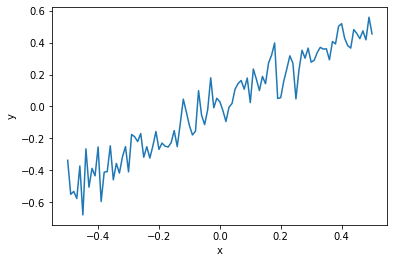

<function matplotlib.pyplot.show(*args, **kw)>

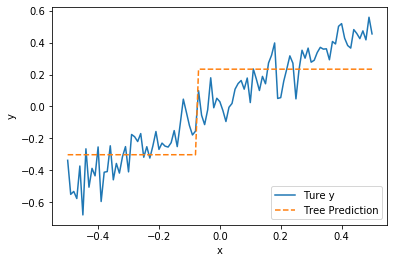

In [27]:
# 合成数组的产生
n = 100
xt = [(float(i)/float(n) - 0.5) for i in range(n+1)]
x = [[s] for s in xt]
# y has random noise added to x-value
# set seed
np.random.seed(1)
y = [s + np.random.normal(scale=0.1) for s in xt] # 上市正态分布的噪音(0,1) * 0.1

plt.plot(xt, y)
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

simpleTree = DecisionTreeRegressor(max_depth=1)
simpleTree.fit(x,y)

# 绘图


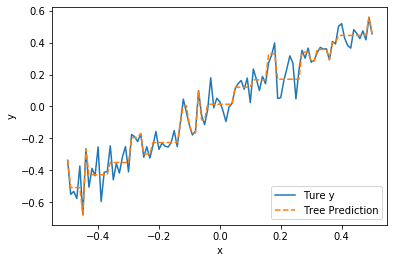

In [45]:
simpleTree2 = DecisionTreeRegressor(max_depth=5)
simpleTree2.fit(x,y)

yHat = simpleTree2.predict(x)
plt.figure()
plt.plot(xt,y,label='Ture y')
plt.plot(xt,yHat,label='Tree Prediction', linestyle='--')
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


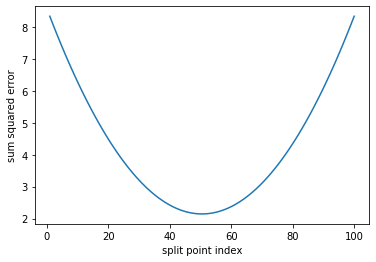

-0.010000000000000009


In [41]:
# 分裂点计算，-尝试所有可能的split point去发现最好
sse = []
xMin = []
for i in range(1,len(xt)):
    # 分裂点
    lhList = list(xt[0:i])
    rhList = list(xt[i:])
    # 计算分裂后的左右均值作为预测值
    lhAvg = sum(lhList) / len(lhList)
    rhAvg = sum(rhList) / len(rhList)
    # 计算均方损失
    lhSse = sum([(s - lhAvg) * (s - lhAvg) for s in lhList])
    rhSse = sum([(s - rhAvg) * (s - rhAvg) for s in rhList])
    
    sse.append(lhSse + rhSse)
    xMin.append(max(lhList))

plt.plot(range(1,len(xt)),sse)
plt.xlabel('split point index')
plt.ylabel('sum squared error')
plt.show()

minSse = min(sse)
idxMin = sse.index(minSse)
print(xMin[idxMin])

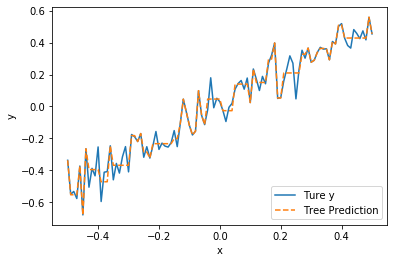

In [44]:
simpleTree6 = DecisionTreeRegressor(max_depth=6)
simpleTree6.fit(x,y)
yHat = simpleTree6.predict(x)

plt.figure()
plt.plot(xt,y,label='Ture y')
plt.plot(xt,yHat,label='Tree Prediction', linestyle='--')
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 决策树的训练等同于分裂点的选择
